In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,MaxPool1D,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/SantanderBank.csv')

In [ ]:
dataset.shape

(76020, 371)

In [ ]:
dataset.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
x=dataset.drop(['ID','TARGET'], axis=1)
y=dataset['TARGET']

In [ ]:
dataset.isnull().sum().sum()

0

**Splitting into train,test**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60816, 369), (15204, 369), (60816,), (15204,))

 **Feature Selection**

Filtering

In [ ]:
filter=VarianceThreshold(0.01)

In [ ]:
x_train=filter.fit_transform(x_train)
x_test=filter.transform(x_test)
x_train.shape, x_test.shape

((60816, 271), (15204, 271))

Finding and Removing Duplicates

In [ ]:
x_train_T=x_train.T
x_test_T=x_test.T

In [ ]:
x_train_T=pd.DataFrame(x_train_T)
x_test_T=pd.DataFrame(x_test_T)

In [ ]:
x_train_T
x_test_T

,0,1,2,3,4,5,6,7,8,9,...,15194,15195,15196,15197,15198,15199,15200,15201,15202,15203
0,2.00,2.00,2.0,2.00,2.00,2.00,2.000000,2.000000,2.00,2.00,...,2.00,2.00,2.0,2.00,2.000000,2.00,2.00,2.000000,2.00,2.00
1,43.00,23.00,57.0,23.00,28.00,23.00,23.000000,23.000000,61.00,50.00,...,36.00,26.00,33.0,54.00,36.000000,30.00,40.00,23.000000,23.00,36.00
2,0.00,0.00,0.0,0.00,450.00,0.00,0.000000,0.000000,0.00,0.00,...,0.00,0.00,0.0,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00
3,0.00,0.00,0.0,0.00,60.87,0.00,0.000000,0.000000,0.00,114.90,...,0.00,0.00,2433.0,59.97,0.000000,0.00,0.00,0.000000,0.00,238.50
4,0.00,0.00,0.0,0.00,231.87,0.00,0.000000,0.000000,0.00,114.90,...,0.00,0.00,2433.0,641.46,0.000000,0.00,0.00,0.000000,0.00,238.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,0.00,0.00,0.0,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,...,0.00,0.00,0.0,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00
267,0.00,0.00,0.0,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,...,0.00,0.00,0.0,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00
268,0.00,0.00,0.0,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,...,0.00,0.00,0.0,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00
269,0.00,0.00,0.0,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,...,0.00,0.00,0.0,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00


In [ ]:
x_train_T.duplicated().sum()

17

In [ ]:
duplicated=x_train_T.duplicated()
duplicated

0      False
1      False
2      False
3      False
4      False
       ...  
266    False
267    False
268    False
269    False
270    False
Length: 271, dtype: bool

In [ ]:
features_to_keep=[not index for index in duplicated]
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [ ]:
x_train=x_train_T[features_to_keep].T
print(x_train.shape)

x_test=x_test_T[features_to_keep].T
print(x_test.shape)

(60816, 254)
(15204, 254)


Standard Scaler

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 4.03619023e-02, -7.88956281e-01, -5.28956723e-02, ...,
        -1.83899380e-02, -1.93311180e-02,  2.67475822e-04],
       [ 4.03619023e-02, -3.25532081e-01, -5.28956723e-02, ...,
        -1.83899380e-02, -1.93311180e-02, -3.17249255e-01],
       [ 4.03619023e-02,  1.37892119e-01, -5.10642999e-02, ...,
        -1.83899380e-02, -1.93311180e-02,  2.67475822e-04],
       ...,
       [ 4.03619023e-02, -7.88956281e-01, -5.28956723e-02, ...,
        -1.83899380e-02, -1.93311180e-02, -3.74127817e-01],
       [ 4.03619023e-02, -7.88956281e-01, -5.28956723e-02, ...,
        -1.83899380e-02, -1.93311180e-02,  2.67475822e-04],
       [ 4.03619023e-02,  6.78553685e-01, -5.28956723e-02, ...,
        -1.83899380e-02, -1.93311180e-02, -3.32005824e-01]])

In [ ]:
x_train.shape,x_test.shape,y_train,y_test

((60816, 254), (15204, 254), 17669    0
 58139    0
 74575    0
 47300    0
 9693     0
         ..
 12895    0
 60960    0
 6012     0
 63107    0
 6558     0
 Name: TARGET, Length: 60816, dtype: int64, 31447    0
 1224     0
 25163    1
 62435    0
 5024     0
         ..
 71076    0
 29722    0
 68065    0
 8762     0
 52994    0
 Name: TARGET, Length: 15204, dtype: int64)

In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

x_train.shape, x_test.shape

((60816, 254, 1), (15204, 254, 1))

In [ ]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

**Building CNN Model**

In [ ]:
model=Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(254,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 252, 32)           128       
                                                                 
 batch_normalization (BatchN  (None, 252, 32)          128       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 126, 32)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 124, 64)           6208      
                                                                 
 batch_normalization_1 (Batc  (None, 124, 64)          2

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train, epochs=20,batch_size=128 ,validation_data=(x_test,y_test))

Epoch 1/20
476/476 [==============================] - 81s 167ms/step - loss: 0.2122 - accuracy: 0.9483 - val_loss: 0.2259 - val_accuracy: 0.9484
Epoch 2/20
476/476 [==============================] - 80s 168ms/step - loss: 0.1750 - accuracy: 0.9586 - val_loss: 0.1722 - val_accuracy: 0.9602
Epoch 3/20
476/476 [==============================] - 80s 169ms/step - loss: 0.1649 - accuracy: 0.9598 - val_loss: 0.1658 - val_accuracy: 0.9607
Epoch 4/20
476/476 [==============================] - 81s 170ms/step - loss: 0.1615 - accuracy: 0.9600 - val_loss: 0.1640 - val_accuracy: 0.9607
Epoch 5/20
476/476 [==============================] - 79s 166ms/step - loss: 0.1589 - accuracy: 0.9601 - val_loss: 0.1629 - val_accuracy: 0.9607
Epoch 6/20
476/476 [==============================] - 81s 171ms/step - loss: 0.1566 - accuracy: 0.9602 - val_loss: 0.1573 - val_accuracy: 0.9607
Epoch 7/20
476/476 [==============================] - 79s 167ms/step - loss: 0.1539 - accuracy: 0.9603 - val_loss: 0.1577 - val_ac

In [ ]:
history.history

{'accuracy': [0.9482866525650024,
  0.958596408367157,
  0.9597803354263306,
  0.9600105285644531,
  0.9601091742515564,
  0.9602078199386597,
  0.9602736234664917,
  0.9602736234664917,
  0.9601585268974304,
  0.9602242708206177,
  0.9602900743484497,
  0.960355818271637,
  0.9603065252304077,
  0.9602900743484497,
  0.9602407217025757,
  0.9602736234664917,
  0.9602242708206177,
  0.960388720035553,
  0.960421621799469,
  0.9604380130767822],
 'loss': [0.21224689483642578,
  0.17503878474235535,
  0.1648632287979126,
  0.1614607572555542,
  0.15886190533638,
  0.15659008920192719,
  0.153931125998497,
  0.15246830880641937,
  0.1512506753206253,
  0.15035857260227203,
  0.149989515542984,
  0.14862799644470215,
  0.14803899824619293,
  0.14730863273143768,
  0.14740990102291107,
  0.14607416093349457,
  0.14648407697677612,
  0.14650583267211914,
  0.14491911232471466,
  0.14460954070091248],
 'val_accuracy': [0.9483688473701477,
  0.9602078199386597,
  0.9606682658195496,
  0.960668

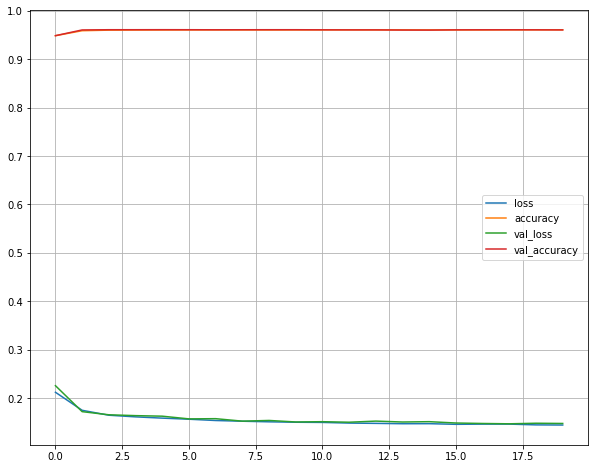

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid(True)
plt.show()

In [ ]:
list_loss=history.history['loss']
index=list_loss.index(min(list_loss))
print('Best_Loss_value=',list_loss[index])


Best_Loss_value= 0.14460954070091248


In [ ]:
#GETTING ACCURACY FOR THAT LOSS VALUE
print('Train_Accuracy=',history.history['accuracy'][index])
print('Test_Accuracy=',history.history['val_accuracy'][index])

Train_Accuracy= 0.9604380130767822
Test_Accuracy= 0.9602736234664917


In [ ]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=1)

476/476 [==============================] - 6s 12ms/step - loss: 0.1478 - accuracy: 0.9603


In [ ]:
print("The loss is ",loss)
print("The accuracy is",accuracy)

The loss is  0.1478462964296341
The accuracy is 0.9602736234664917
